In [1]:
import tensorflow as tf
from tqdm import tqdm

from model.ONN import ONNModel
from utils.loss_metrics import loss, grad, optimizer_init
from utils.utils_func import data_loader, _labelMapping, detector_regions


In [2]:
#load data
__, __, test_set, test_lab = data_loader(64)
#convert to tensors
tf_test_set = tf.convert_to_tensor(test_set, dtype=tf.complex64)

In [3]:
pretrained_model = tf.keras.models.load_model("./saved_model/test1")
pretrained_model.summary()

Model: "onn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 optical_layer (opticalLayer  multiple                 4096      
 )                                                               
                                                                 
 optical_layer_1 (opticalLay  multiple                 4096      
 er)                                                             
                                                                 
 optical_layer_2 (opticalLay  multiple                 4096      
 er)                                                             
                                                                 
 optical_layer_3 (opticalLay  multiple                 4096      
 er)                                                             
                                                                 
 optical_layer_4 (opticalLay  multiple                 40

In [4]:
test_num = 1024
test_img = tf_test_set[test_num]
test_out = pretrained_model(test_img, training=False)
test_out.shape

TensorShape([64, 64])

In [5]:
import matplotlib.pyplot as plt

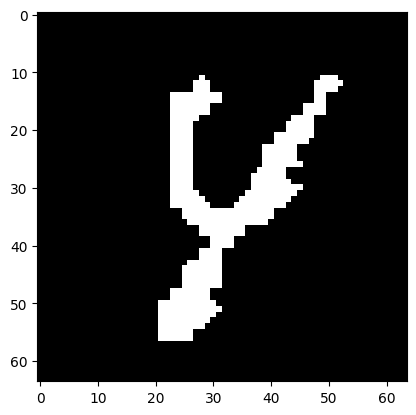

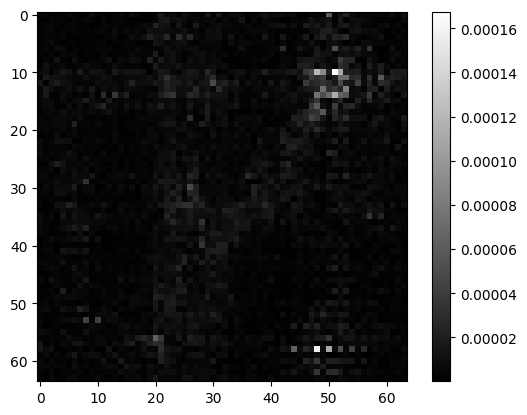

In [6]:
plt.figure()
plt.imshow(tf.abs(test_img), cmap="gray")
plt.figure()
plt.imshow(tf.abs(test_out), cmap="gray")
plt.colorbar()
# plt.figure()
# plt.imshow(tf.abs(test_lab[test_num]), cmap="gray")

In [10]:
det = detector_regions(test_out)
det_sqr = tf.square(det)
print(det_sqr)

tf.Tensor(
[7.0461595e-11 1.0570362e-10 1.3884641e-09 4.3925405e-11 1.8895414e-10
 9.9902302e-11 6.8837415e-11 1.9941021e-11 4.7395705e-11 3.9352601e-11], shape=(10,), dtype=float32)


In [13]:
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(scce([4], det_sqr).numpy())
cce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
print(cce([0,0,0,0,1,0,0,0,0,0], det_sqr).numpy())

2.3025851
2.3025851


In [20]:
import numpy as np

In [22]:
bb = [7.0461595e-11, 1.0570362e-10, 1.3884641e-09, 4.3925405e-11, 1.8895414e-2, 9.9902302e-11, 6.8837415e-11, 1.9941021e-11, 4.7395705e-11, 3.9352601e-11]
print(tf.argmax(bb))
print(bb/np.amax(bb))
print(scce([4], bb/np.amax(bb)).numpy())

tf.Tensor(4, shape=(), dtype=int64)
[3.72903155e-09 5.59414152e-09 7.34815390e-08 2.32465957e-09
 1.00000000e+00 5.28711898e-09 3.64307525e-09 1.05533655e-09
 2.50831789e-09 2.08265355e-09]
1.4611501802430495


In [ ]:
aa = tf.abs(test_out)/tf.reduce_max(tf.abs(test_out))
tf.reduce_min(aa)